# Échantillonnage par incertitude fondé sur les fonctions de croyance (USBF)

Ce *notebook* s'intéresse à la méthode d'échantillonnage décrite par l'article :

    Zhang S X, Han D Q, Yang Y. Active learning based on belief functions. Sci China Inf Sci, 2020, 63(11):
    210205, https://doi.org/10.1007/s11432-020-3082-9

On le comparera avec les méthodes d'échantillonnage suivantes :

- aléatoire (**RD**) ;
- par incertitude classique (**UNC**) ;
- par incertitude entropique (**UNC-ENT**).

De plus, les comparaisons se feront avec les classificateurs suivants :

- *Random Forest* (**RF**) ;
- régression logistique (**LR**) ;
- les 5 plus proches voisins crédibilistes (**E5NN**).

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

from modAL.uncertainty import uncertainty_sampling

from experiment.eknn import EKNN
from experiment.lib import visualise, get_X_y, test
from experiment.max_am import ambiguity_measure, max_am

In [2]:
RANDOM_STATE  = 23
YLIMIT        = [.6, 1.]

N_QUERIES     = 50
N_SPI         = 5    # Number of samples to label per iteration
TEST_SIZE     = 75  # Number of samples in test size

# Condition: N_CLASSES * N_CPC <= 2^N_INFORMATIVE
N_CLASSES     = 2
N_CPC         = 4    # Number of clusters per class
N_INFORMATIVE = 3

N_SAMPLES     = 200 # Size of the synthetic datasets

# Classifiers
classifiers = (
    ("RF",      RandomForestClassifier, "g", { "n_estimators": 100, }),
    ("LR",      LogisticRegression,     "k", { "max_iter": 1000, }),
    ("E5NN",    EKNN,                   "m", { "n_neighbors": 5, "multiprocesses": True, }),
)

# Sampling methods
sampling = (
    ("E1NNS", "eknn", "-"),
    ("RD",    None,   "-."),  # Random Sampling
)

## USBF vs RD

On compare USBF à RD dans un premier temps sur divers jeux de données.

### Données synthétiques

On considère des données [synthétiques](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) définies par les paramètres écrites dans la cellule de code précédente.

#### Deux classes

##### Distribuées équitablement

  [ syn_50_50_usbf_rd_LR done in 4.73 s ] (LR)
syn_50_50_usbf_rd achieved in 4.73 s


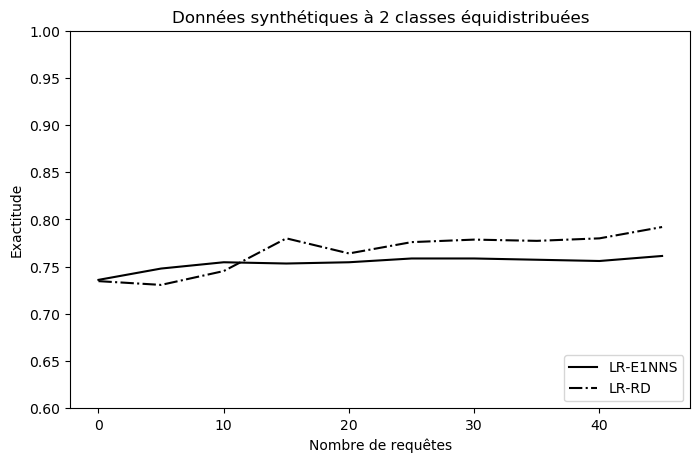

In [3]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .5),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_50_usbf_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### Distribuées inégalement

  [ syn_75_25_usbf_rd_LR done in 4.53 s ] (LR)
syn_75_25_usbf_rd achieved in 4.53 s


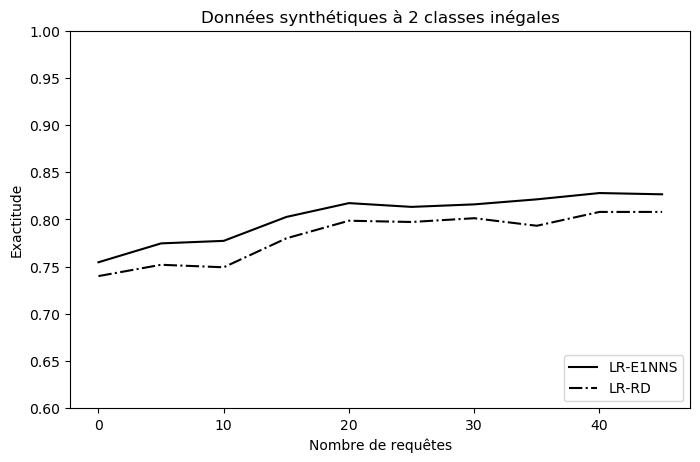

In [4]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.75, .25),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_75_25_usbf_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

### Données réelles

#### Skin Segmentation

In [ ]:
# 10,000 random indices
rng = np.random.default_rng(RANDOM_STATE)
X, y = get_X_y("data/skin_segmentation.csv")

values = set()
while len(values) < 10000:
    index = rng.integers(X.shape[0])
    values.add(index)
values = np.array(list(values))

# Restricted dataset
X, y = X[values], y[values]

results = test("real", "real_skin_usbf_rd", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Skin Fragmentation", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results, values

## USBF vs UNC

In [ ]:
# Sampling methods
sampling = (
    ("USBF", max_am, "-"),
    ("UNC",  uncertainty_sampling,   "-."),
)

#### Deux classes

##### Distribuées équitablement

In [ ]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.5, .5),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_50_50_usbf_unc", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes équidistribuées", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results

##### Distribuées inégalement

In [ ]:
X, y = make_classification(
    n_samples            = N_SAMPLES,
    n_classes            = N_CLASSES,
    n_clusters_per_class = N_CPC,
    n_informative        = N_INFORMATIVE,
    weights              = (.75, .25),
    random_state         = RANDOM_STATE
)

results = test("syn", "syn_75_25_usbf_unc", X, y, classifiers, N_QUERIES, N_SPI, sampling, test_size=TEST_SIZE/y.shape[0])
visualise("Données synthétiques à 2 classes inégales", N_QUERIES, N_SPI, YLIMIT, **results)

del X, y, results